In [12]:
import torch

import numpy as np
import matplotlib.pyplot as plt

In [18]:
print(f"PyTorch version: {torch.__version__}")
# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")


PyTorch version: 2.0.1
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


## Train Segmentor

In [20]:
# Load train/test data (this is a simple dataset generated just from a single image)
dataset = np.load('../generated_images/PdSeM_train_test.npz')
images = dataset['X_train'].reshape((-1,256,256))
labels = dataset['y_train'].reshape((-1,256,256))
images_test = dataset['X_test'].reshape((-1,256,256))
labels_test = dataset['y_test'].reshape((-1,256,256))


In [40]:
model = aoi.models.Segmentor(nb_classes=4)

/Users/austin/miniforge3/envs/torch_env/lib/python3.8/site-packages/atomai/trainers/trainer.py:653: UserWarning: No GPU found. The training can be EXTREMELY slow
  warnings.warn(


In [ ]:
model.fit(images, labels, images_test, labels_test, # training data
          training_cycles=300, compute_accuracy=True, swa=True # training parameters
) 


In [35]:
model = torch.load('../model_metadict_final.tar', map_location=torch.device('cpu'))

## Use model on real data (get center atom pos)

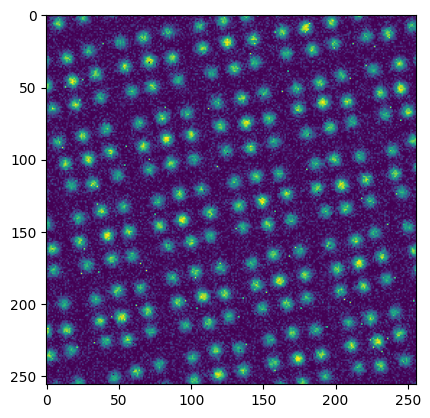

In [38]:
expdata = images_test[50]
plt.figure()
plt.imshow(expdata)

In [39]:
nn_output, coordinates = model.predict(expdata)

AttributeError: 'dict' object has no attribute 'predict'

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))
ax1.imshow(expdata, cmap='gray', origin="lower")
ax2.imshow(nn_output.squeeze(), origin="lower")

In [ ]:
aoi.utils.plot_coord(expdata, coordinates[0], fsize=12)

## Train VAE

## Display my statistical unit cell